<a href="https://colab.research.google.com/github/davidedifilippo/learning_feedback_control_systems/blob/main/compensazione_es_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 8.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [4]:
P1 = control.tf([10], [0.1, 1])
P2 = control.tf([1], [0.01, 1])
P = control.series(P1, P2)

print("P(s) =", P)

P(s) = 
          10
----------------------
0.001 s^2 + 0.11 s + 1



In [19]:
#controllore (parte statica KG/s parte dinamica R(s) 

# G(s) = KG * 1/s * R(s)

#deve essere errore di posizione nullo ep = (Kd^2 / (Kd + Kp) con kp = lim s->0 F(s) guadagno del ramo diretto ed errore di velocità ev = (kd^2 / Kv) minore di 0.01 

KG = 10 

G = control.tf([KG], [1,0])
print("G(s)=", G)

G(s)= 
10
--
s



**Il polo nell'origine rende il sistema astatico per distubi costanti in uscita**  

F(s)= 
          100
------------------------
0.001 s^3 + 0.11 s^2 + s



(array([-100.+0.j,  -10.+0.j,    0.+0.j]), array([], dtype=complex128))

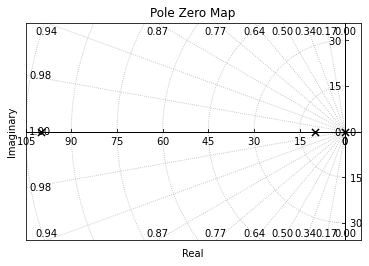

In [20]:
F = control.series(G, P)
print("F(s)=", F)
control.pzmap(F, grid = True)


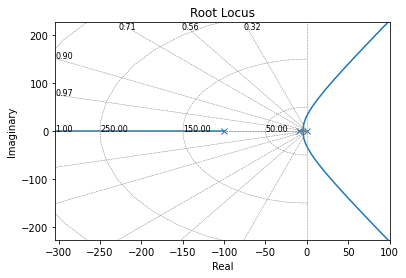

In [21]:
#Trova le radici della W(s) al variare del guadagno K del ramo diretto

control.root_locus(F, initial_gain=0)

plt.show()


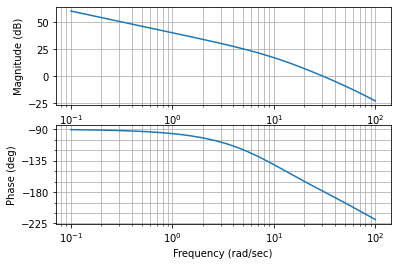

In [31]:
# Bode Diagram with Stability Margins

# Frequencies
w_start = 0.1
w_stop = 100
step = 0.01
N = int ((w_stop-w_start )/step) + 1
w = np.linspace (w_start , w_stop , N)

# Bode Plot

w, mag, phase = control.bode(F, w,  dB=True, grid=True, plot=True)

plt.show()

In [32]:
# Calculating stability margins and crossover frequencies

gm , pm , w180 , wc = control.margin(F)

# Convert gm to Decibel

gmdb = 20 * np.log10(gm)
print("wc =", f'{wc:.2f}', "rad/s")
print("w180 =", f'{w180:.2f}', "rad/s")
print("GM =", f'{gm:.2f}')
print("GM =", f'{gmdb:.2f}', "dB")
print("PM =", f'{pm:.2f}', "deg")

# Find when System is Marginally Stable (Kritical Gain - Kc)
Kp = 1
Kc = Kp*gm
print("Kc =", f'{Kc:.2f}')

wc = 30.15 rad/s
w180 = 31.62 rad/s
GM = 1.10
GM = 0.83 dB
PM = 1.58 deg
Kc = 1.10


0

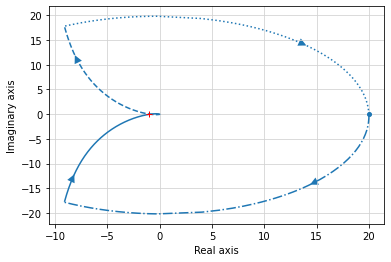

In [24]:
fig = plt.figure()
control.nyquist_plot(F)